# 📊 Student Lifestyle & Well-being Survey — Stress Management Analysis
### Target Variable: **I feel like I have a good handle on managing my stress.**
---

In [1]:
# 📌 Code Step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

### 🔹 Load and Preview Dataset

In [2]:
# 📌 Code Step

file_path = "Responses.csv"
df = pd.read_csv(file_path)

print("Initial Dataset Shape:", df.shape)
df.head()


Initial Dataset Shape: (502, 44)


,What is your current age?,What is your gender identity?,Which year of study are you currently in?,"Do you live on-campus (e.g., dormitory/hostel)?","On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?",I feel overwhelmed by my academic workload.,"How often do you participate in extracurricular activities (clubs, sports, volunteering)?",I am generally satisfied with my current academic performance.,Do you hold a part-time job while attending college?,How stressed have you felt over the past month?,...,Are you currently employed?,How would you describe your personality?,Do you love yourself?,Do you care about what others think of you?,I often compare my life to others on social media.,"I feel comfortable saying ""no"" to people when I need to.",Do you have a clear set of goals for the next 5 years?,I generally have a positive outlook on life.,Are you in Relationship?,Unnamed: 43
0,16-19,Male,Third Year,Yes,< 4 hours,True,Once a week,Agree,Yes,Low,...,Yes,Introvert,Yes,Yes,False,True,Yes,False,NaN,NaN
1,20-22,Male,Third Year,Yes,< 4 hours,True,Rarely/Never,Disagree,No,Moderate,...,NaN,Ambivert (Neutral),NaN,Yes,True,True,No,True,NaN,NaN
2,20-22,Male,Third Year,Yes,10+ hours,False,Rarely/Never,Agree,No,Very Low,...,NaN,Ambivert (Neutral),NaN,No,False,True,Yes,True,NaN,NaN
3,20-22,Female,Third Year,Yes,< 4 hours,True,Once a month,Disagree,No,High,...,NaN,Ambivert (Neutral),NaN,No,False,True,Yes,True,NaN,NaN
4,20-22,Male,Second Year,Yes,4-6 hours,False,Once a month,Agree,No,Moderate,...,NaN,Extrovert,NaN,Yes,False,True,Yes,True,NaN,NaN


### 🔧 Clean Dataset — Remove unwanted columns

In [3]:
# 📌 Code Step
df.isna().sum()

What is your current age?                                                                               2
What is your gender identity?                                                                           2
Which year of study are you currently in?                                                               2
Do you live on-campus (e.g., dormitory/hostel)?                                                         2
On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?      2
I feel overwhelmed by my academic workload.                                                             2
How often do you participate in extracurricular activities (clubs, sports, volunteering)?               2
I am generally satisfied with my current academic performance.                                          2
Do you hold a part-time job while attending college?                                                    2
How stressed have you felt over the past month

In [4]:
# 📌 Code Step
df.dropna(how='all', inplace=True)

In [5]:
# 📌 Code Step
df.isna().sum()

What is your current age?                                                                               0
What is your gender identity?                                                                           0
Which year of study are you currently in?                                                               0
Do you live on-campus (e.g., dormitory/hostel)?                                                         0
On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?      0
I feel overwhelmed by my academic workload.                                                             0
How often do you participate in extracurricular activities (clubs, sports, volunteering)?               0
I am generally satisfied with my current academic performance.                                          0
Do you hold a part-time job while attending college?                                                    0
How stressed have you felt over the past month

In [6]:
# Calculate percentage of null values in each column
null_percent = df.isnull().mean()

# Drop columns where null percentage is greater than 0.5 (50%)
df = df.drop(columns=null_percent[null_percent > 0.5].index)

In [7]:
# 📌 Code Step
df.isna().sum()

What is your current age?                                                                             0
What is your gender identity?                                                                         0
Which year of study are you currently in?                                                             0
Do you live on-campus (e.g., dormitory/hostel)?                                                       0
On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?    0
I feel overwhelmed by my academic workload.                                                           0
How often do you participate in extracurricular activities (clubs, sports, volunteering)?             0
I am generally satisfied with my current academic performance.                                        0
Do you hold a part-time job while attending college?                                                  0
How stressed have you felt over the past month?                 

In [8]:
# 📌 Code Step
df.dropna(inplace=True)

In [9]:
# 📌 Code Step
df.isna().sum()

What is your current age?                                                                             0
What is your gender identity?                                                                         0
Which year of study are you currently in?                                                             0
Do you live on-campus (e.g., dormitory/hostel)?                                                       0
On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?    0
I feel overwhelmed by my academic workload.                                                           0
How often do you participate in extracurricular activities (clubs, sports, volunteering)?             0
I am generally satisfied with my current academic performance.                                        0
Do you hold a part-time job while attending college?                                                  0
How stressed have you felt over the past month?                 

In [10]:
# 📌 Code Step
print("Dataset Shape after cleaning:", df.shape)

Dataset Shape after cleaning: (499, 38)


### 📊Exploratory Data Analysis

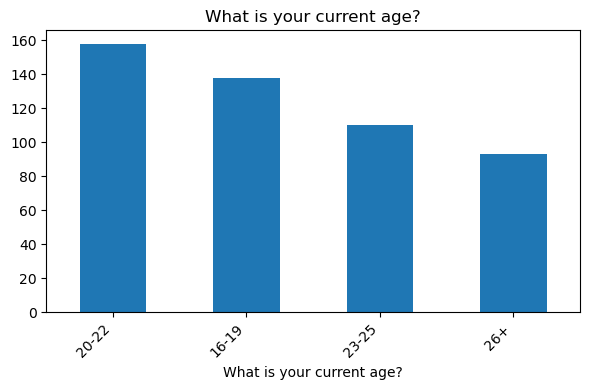

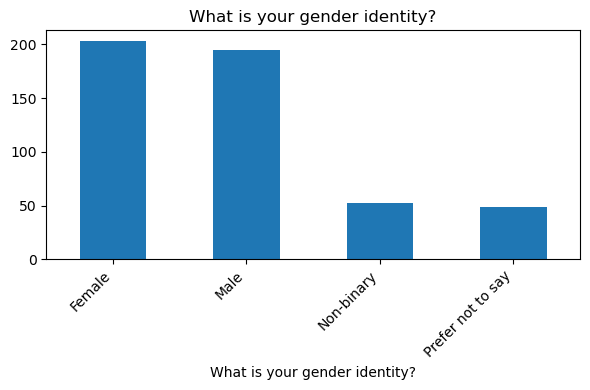

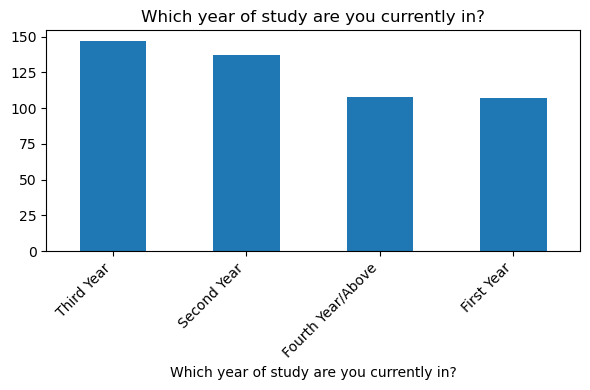

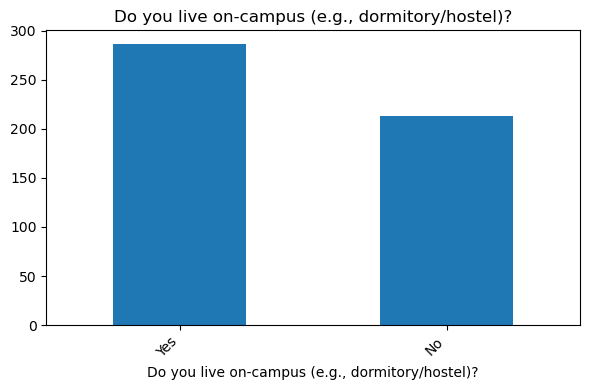

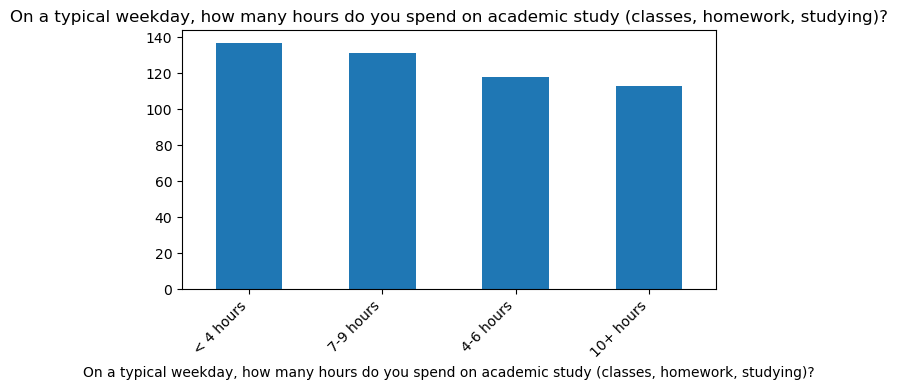

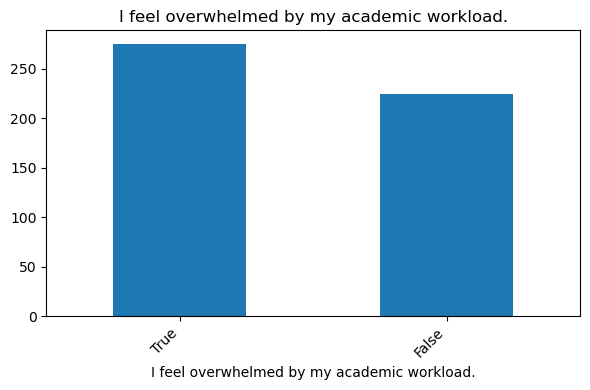

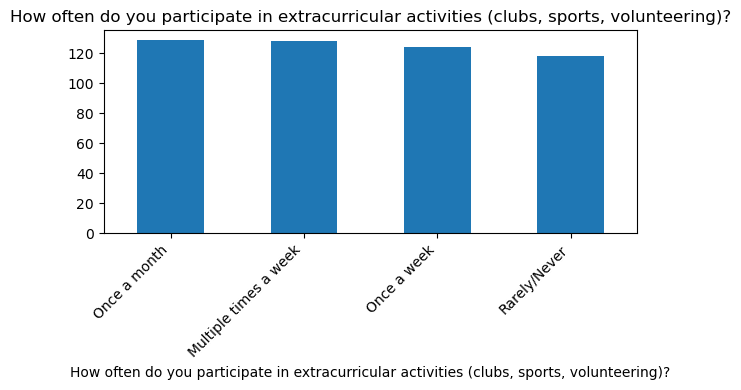

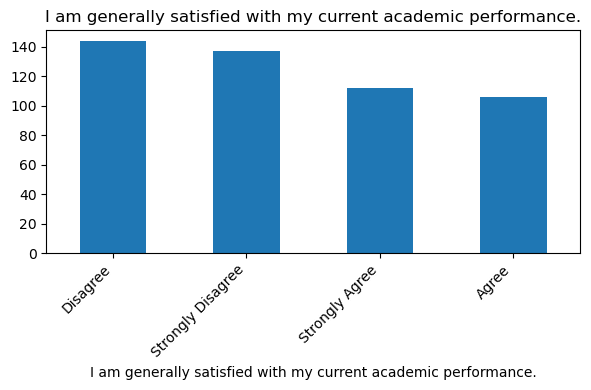

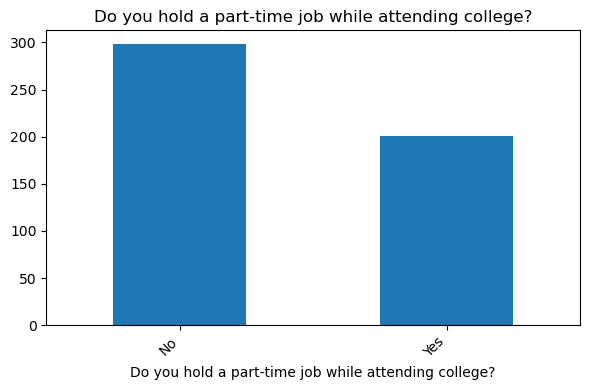

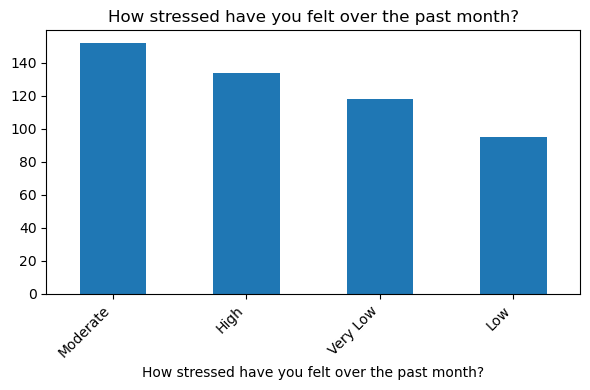

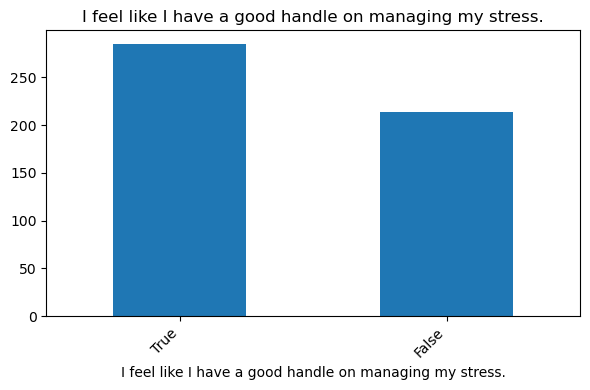

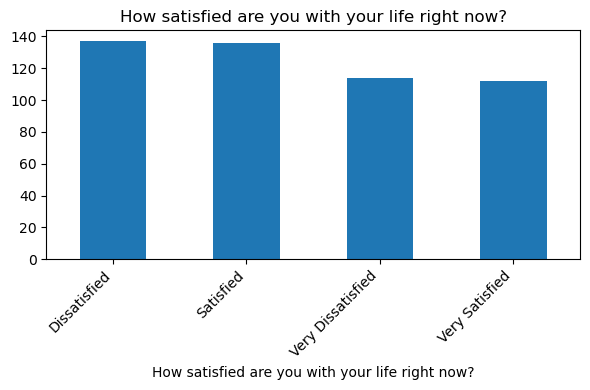

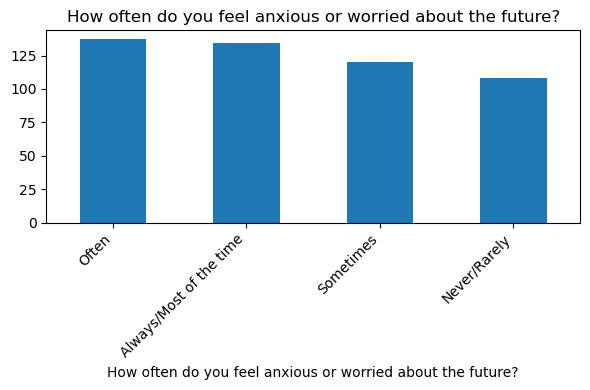

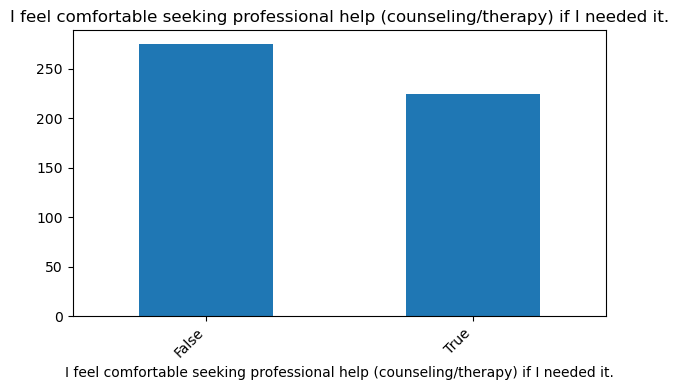

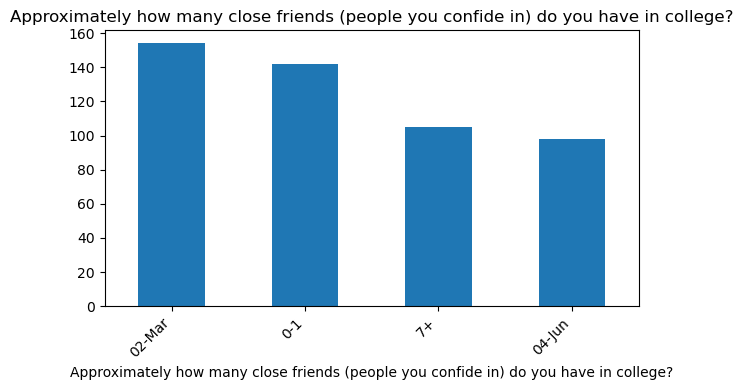

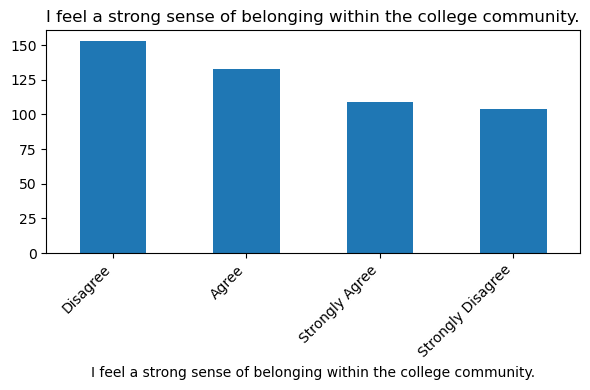

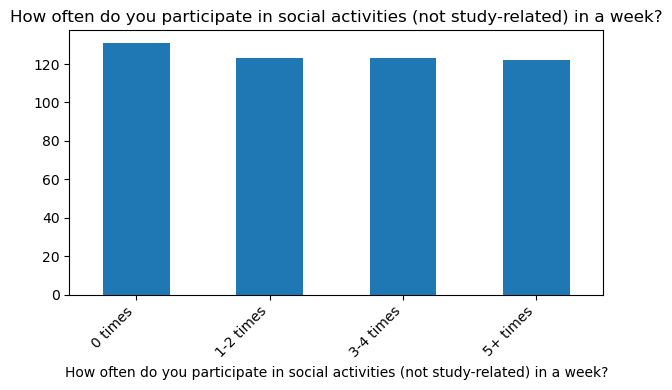

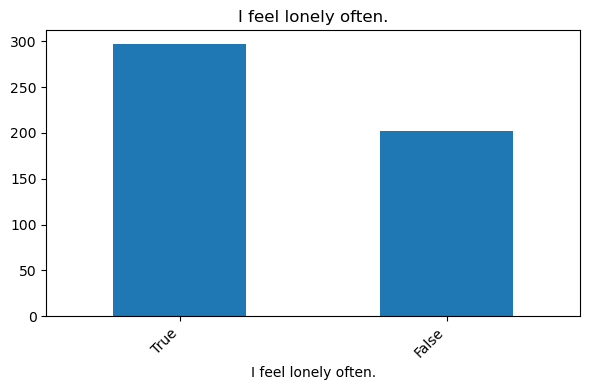

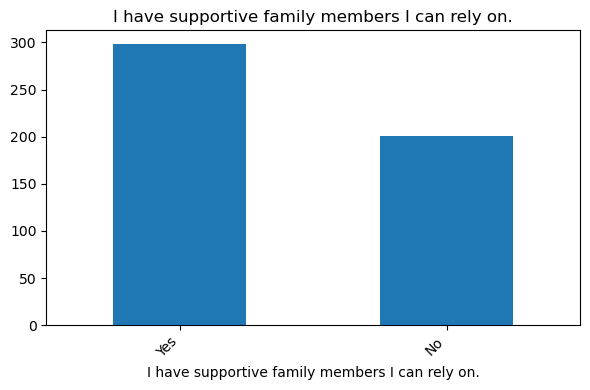

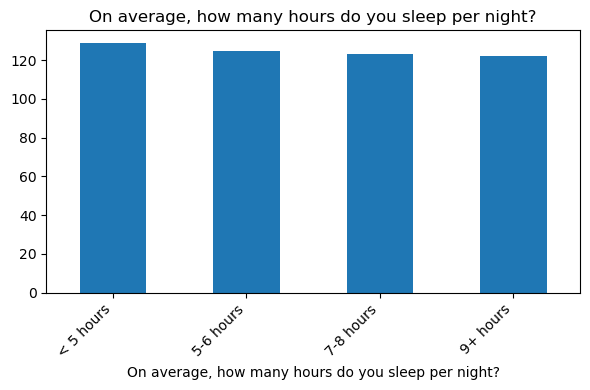

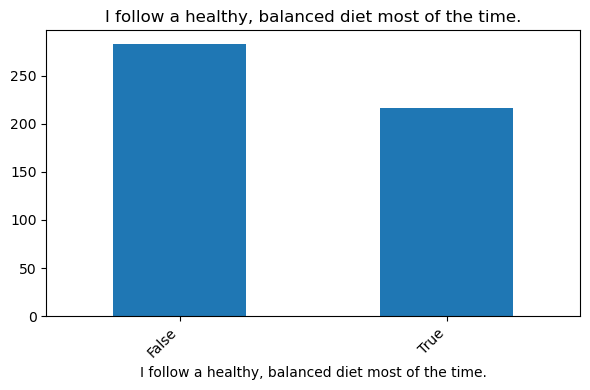

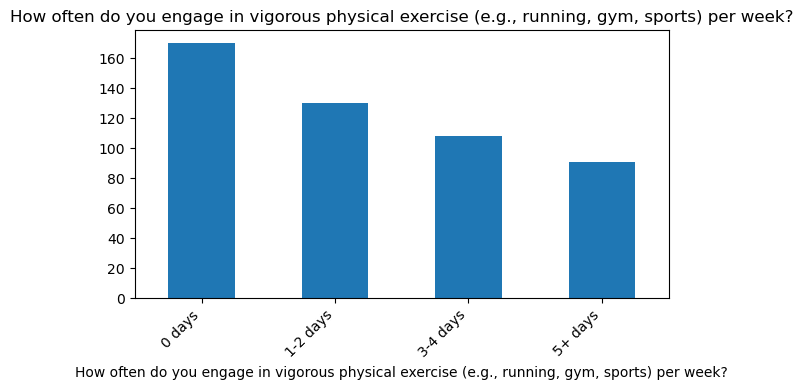

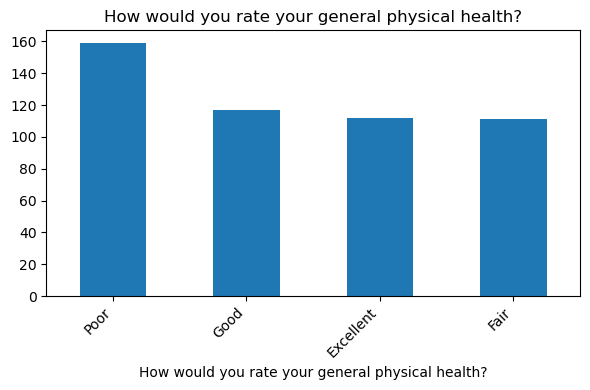

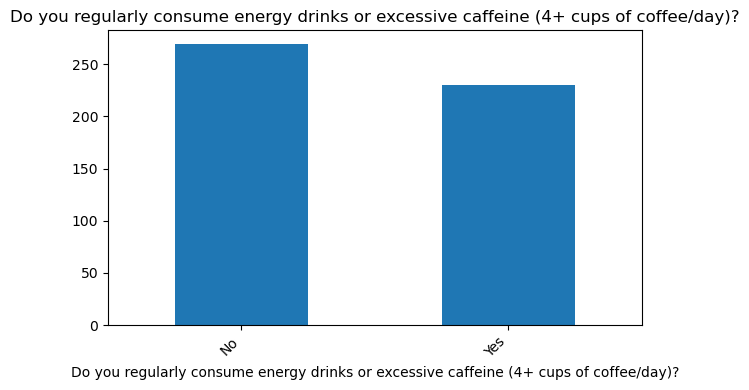

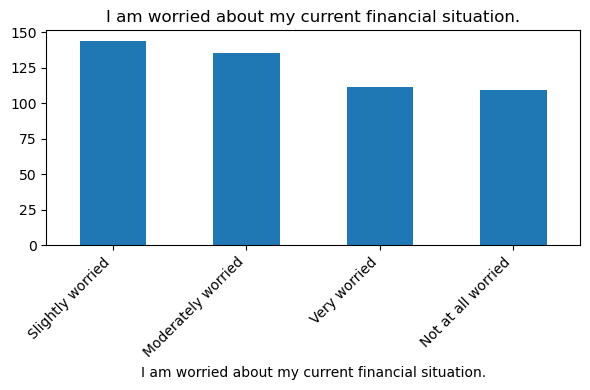

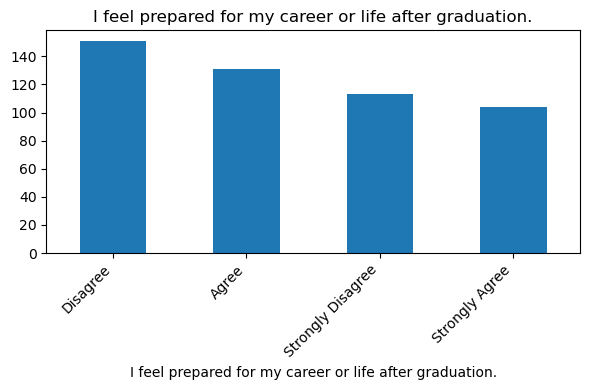

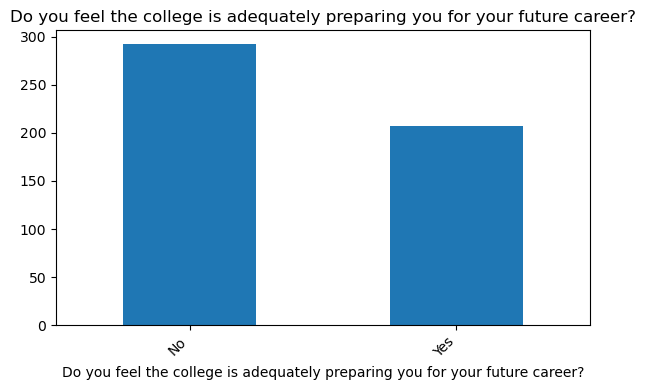

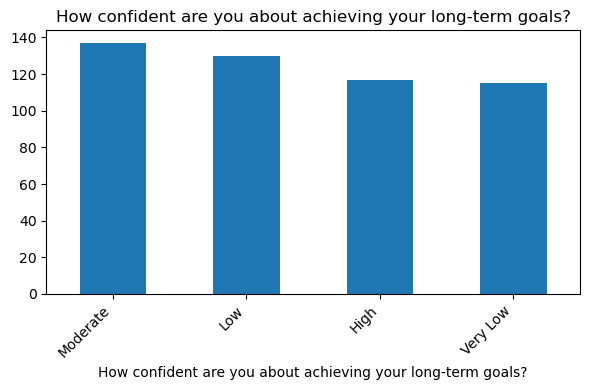

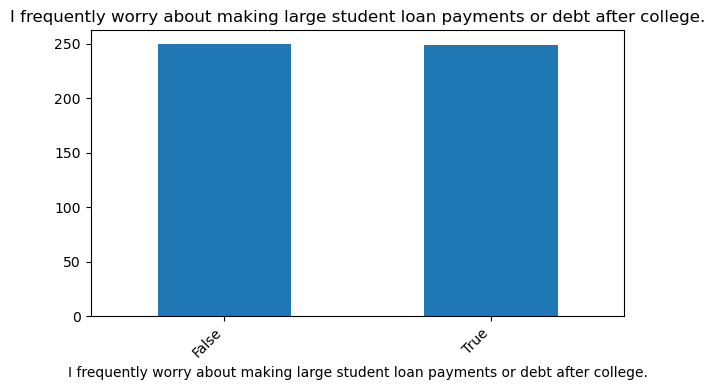

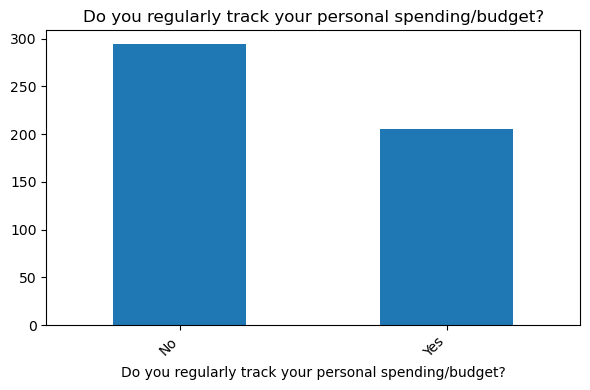

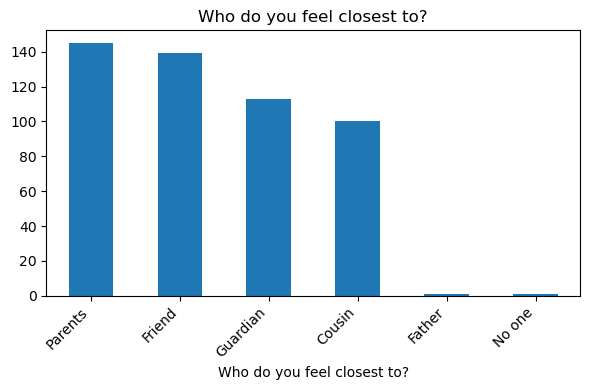

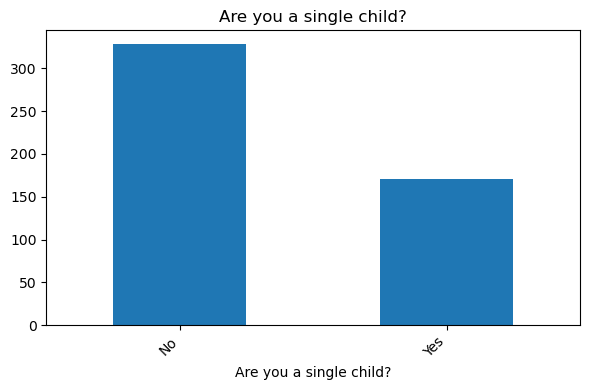

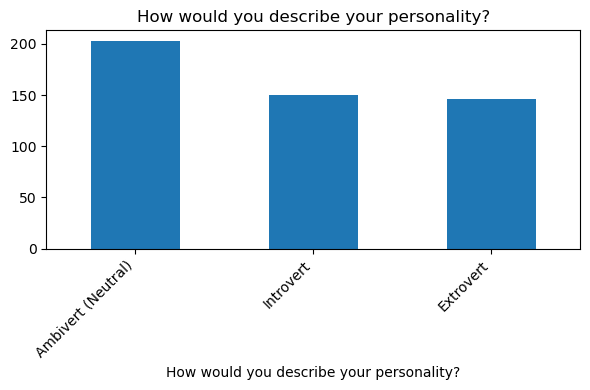

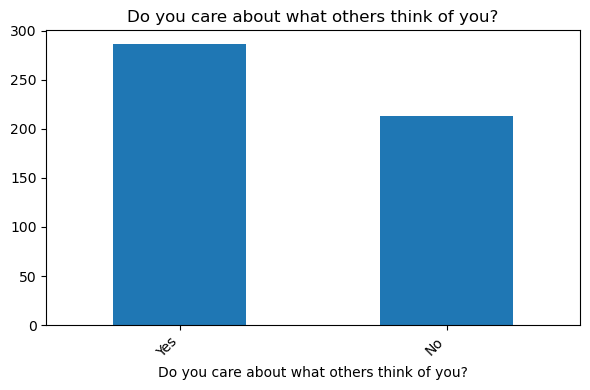

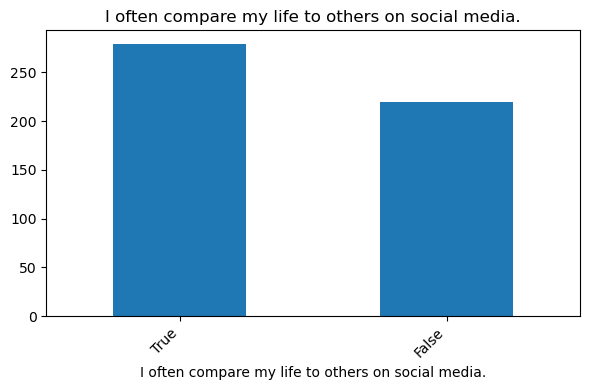

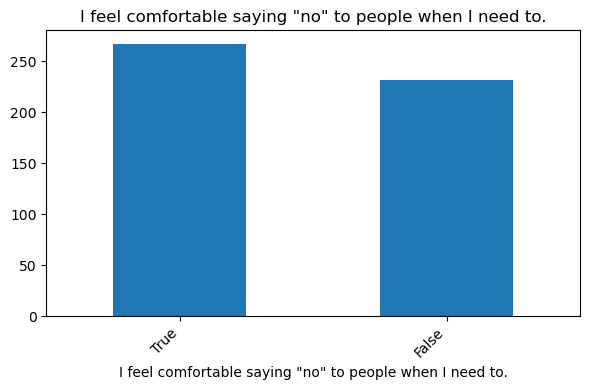

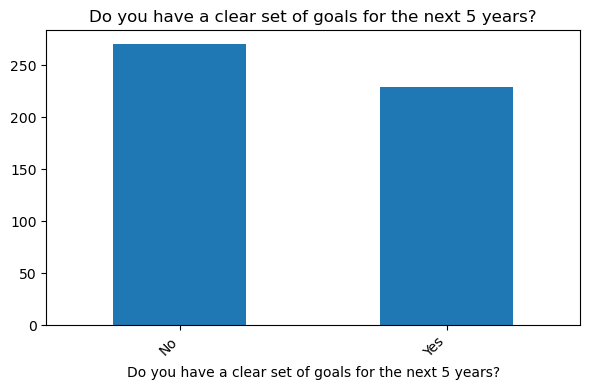

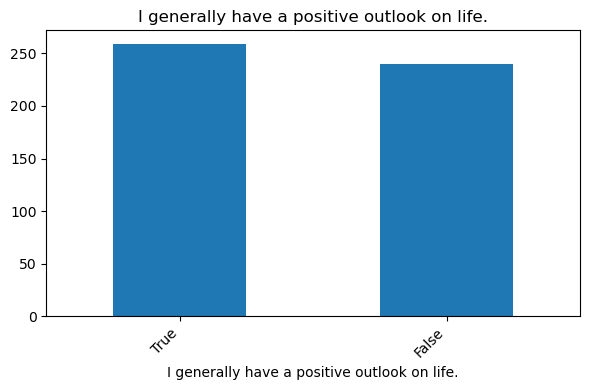

In [11]:
# 📌 Code Step
def plot_bar(col):
    counts = df[col].value_counts()
    if counts.empty:
        return
    plt.figure(figsize=(6,4))
    counts.plot(kind="bar")
    plt.title(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for col in df.columns:
    plot_bar(col)

### 🔁 Encode Categorical Values

In [12]:
# 📌 Code Step
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

df.head()

,What is your current age?,What is your gender identity?,Which year of study are you currently in?,"Do you live on-campus (e.g., dormitory/hostel)?","On a typical weekday, how many hours do you spend on academic study (classes, homework, studying)?",I feel overwhelmed by my academic workload.,"How often do you participate in extracurricular activities (clubs, sports, volunteering)?",I am generally satisfied with my current academic performance.,Do you hold a part-time job while attending college?,How stressed have you felt over the past month?,...,I frequently worry about making large student loan payments or debt after college.,Do you regularly track your personal spending/budget?,Who do you feel closest to?,Are you a single child?,How would you describe your personality?,Do you care about what others think of you?,I often compare my life to others on social media.,"I feel comfortable saying ""no"" to people when I need to.",Do you have a clear set of goals for the next 5 years?,I generally have a positive outlook on life.
0,0,1,3,1,3,1,2,0,1,1,...,0,1,1,0,2,1,0,1,1,0
1,1,1,3,1,3,1,3,1,0,2,...,1,0,5,0,0,1,1,1,0,1
2,1,1,3,1,0,0,3,0,0,3,...,0,1,2,0,0,0,0,1,1,1
3,1,0,3,1,3,1,1,1,0,0,...,1,1,2,0,0,0,0,1,1,1
4,1,1,2,1,1,0,1,0,0,2,...,1,1,5,0,1,1,0,1,1,1


### 📌 Select Target and Analyze Correlations

In [13]:
# 📌 Code Step

target_col = "I feel like I have a good handle on managing my stress."

correlations = df.corr()[target_col].abs().sort_values(ascending=False)
top_features = correlations.index[1:6]  # top 5 excluding target

print("Top correlated features with target:")
top_features


Top correlated features with target:


Index(['On average, how many hours do you sleep per night?',
       'I feel overwhelmed by my academic workload.',
       'I feel comfortable seeking professional help (counseling/therapy) if I needed it.',
       'I feel lonely often.', 'Are you a single child?'],
      dtype='object')

### 🔥 Feature Correlation Heatmap

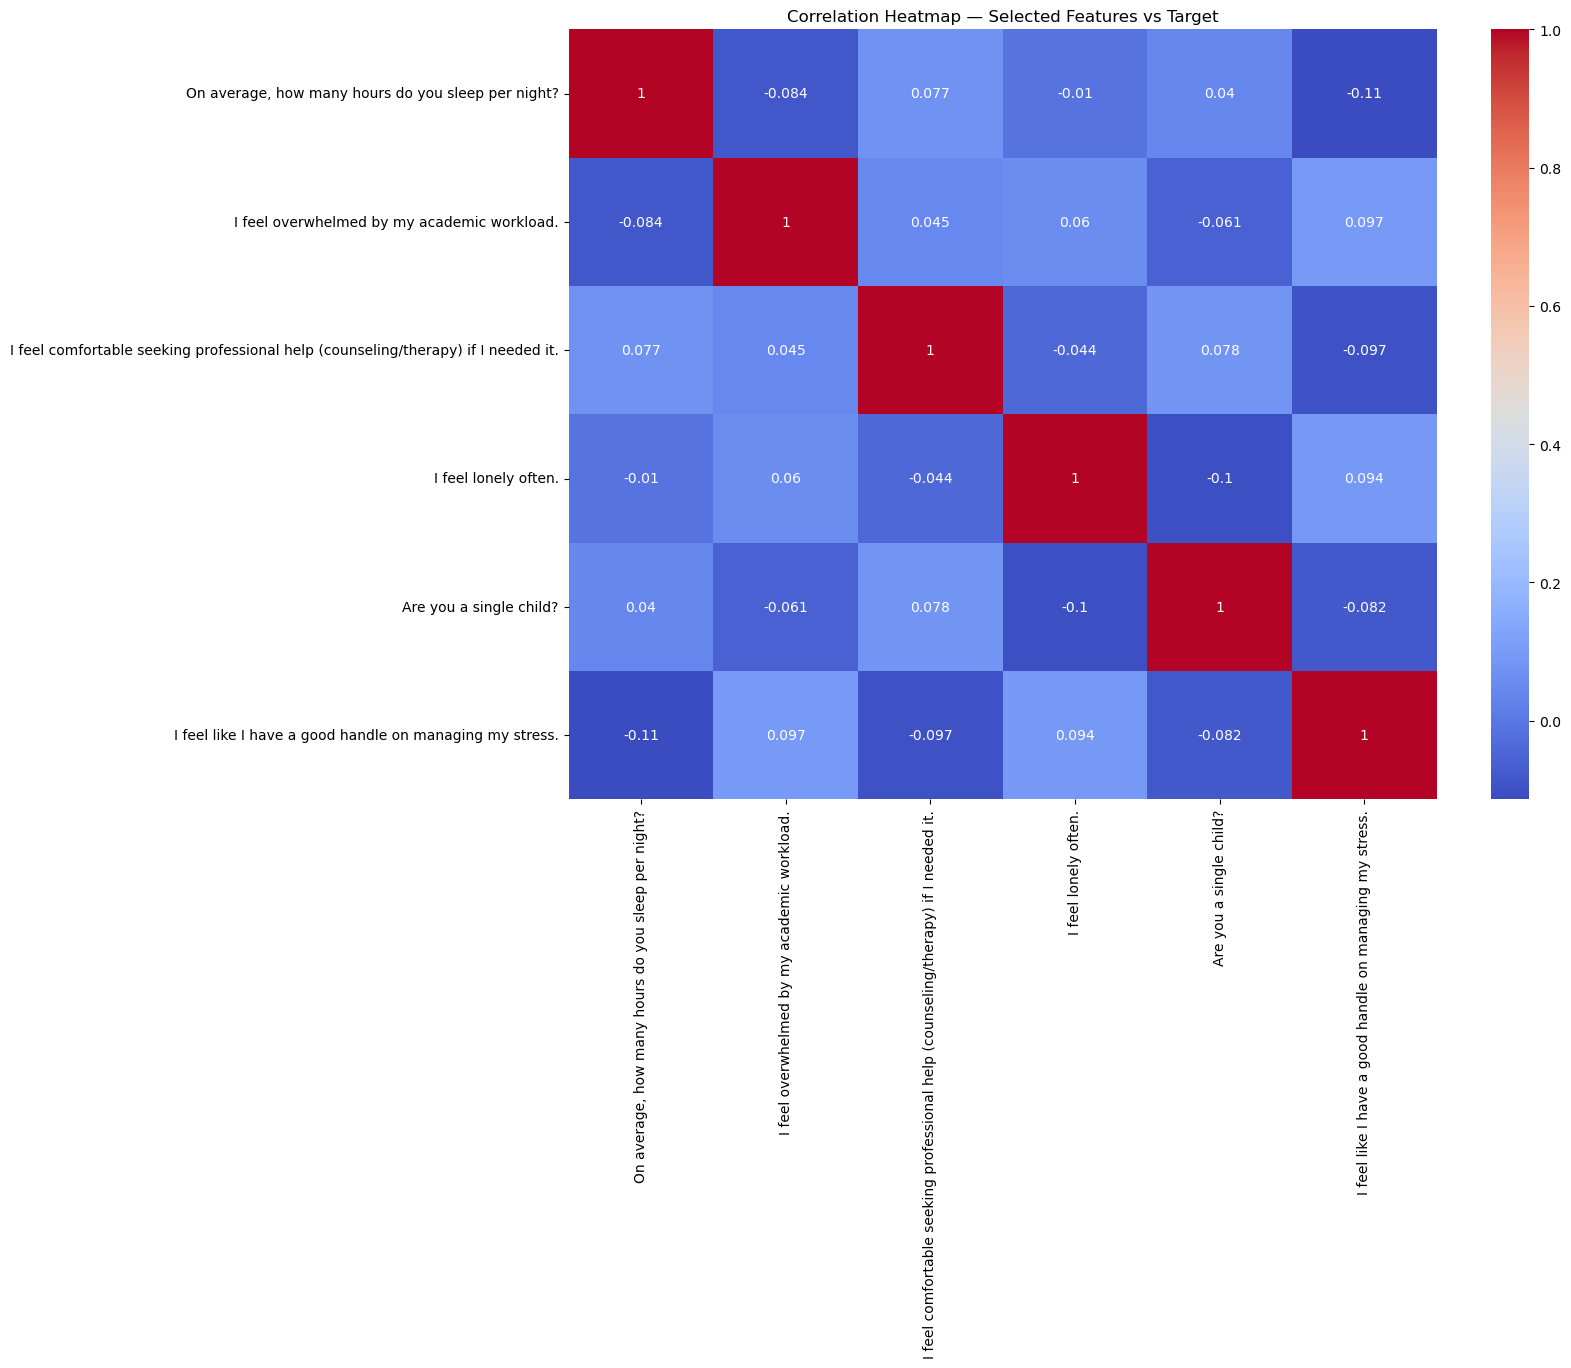

In [14]:
# 📌 Code Step

plt.figure(figsize=(14,10))
sns.heatmap(df[top_features.tolist() + [target_col]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — Selected Features vs Target")
plt.show()


### 🧠 Model Training — Logistic Regression

In [15]:
# 📌 Code Step

X = df[top_features]
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### 📈 Model Evaluation

🔹 Accuracy: 0.56

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.24      0.31        41
           1       0.60      0.78      0.68        59

    accuracy                           0.56       100
   macro avg       0.52      0.51      0.49       100
weighted avg       0.53      0.56      0.53       100



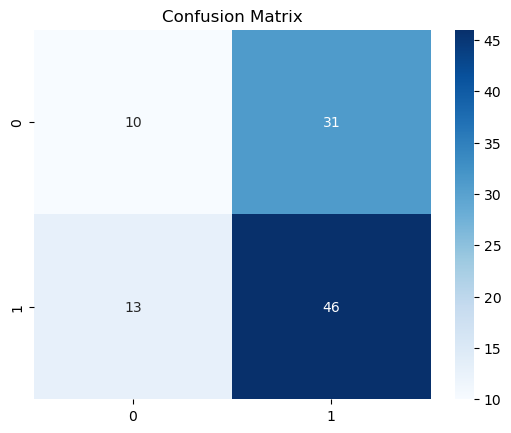


🔹 Mean Cross-validation Score: 0.5692727272727273


In [16]:
# 📌 Code Step

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()
print("\n🔹 Mean Cross-validation Score:", cv_score)


### 💾 Save Trained Model

In [17]:
# 📌 Code Step

model_path = "stress_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(model, f)

model_path

'stress_model.pkl'